In [1]:
import pandas as pd
import locale
import matplotlib.pyplot as plt
import mplcyberpunk
import requests

from bs4 import BeautifulSoup
from datetime import datetime

## Lista de bilionários de 2022 segundo a Forbes

In [2]:
urls = []  # Lista com as URLs

urls.append('https://forbes.com.br/bilionarios-2022/2022/12/lista-forbes-de-bilionarios-brasileiros/')  # Adicionando a primeira URL do artigo da Forbes

for index in range(2, 16):
    urls.append(f'https://forbes.com.br/forbes-money/2022/12/lista-forbes-de-bilionarios-brasileiros-{index}/')  # Demais URLs

In [3]:
BROWSERS = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/357.36 \(KHTML, like Gecko) Chrome / 86.0.4240Safari / 537.36'}  # Constante para simular acesso humano
names = []  # lista do nome dos bilionários
patrimonies = []  # Lista do patrimônio

for url in urls:
    response = requests.get(url, headers=BROWSERS)  # Obtendo o conteúdo da página em binário
    content = response.text  # Transformando de binário para html
    soup_content = BeautifulSoup(content, 'html.parser')  # Transformando o conteúdo da página em objetos do BeautifullSoup
    cards = soup_content.find_all('li', attrs={'data-aos': 'fade-up'})  # Selecionando o elemento html de onde serão extraídas as informações

    for card in cards:
        name = card.h3.text  # Obtendo o nome do bilionário
        patrimony = card.p.strong.text.split(' ')[1].replace(',', '.')  # Obtendo o patrimônio do bilionário
        names.append(name.upper())  # Adicionando o nome na lista de nomes
        patrimonies.append(patrimony)  # Adicionando o patrimônio na lista de patrimônios


In [4]:
df_billionaires = pd.DataFrame()  # Criando o dataframe
df_billionaires['Nome'] = names  # Populando a coluna de nomes com a lista de nomes obtidas no webscraping
df_billionaires['Patrimônio em bilhões R$'] = pd.to_numeric(patrimonies)  # Populando a coluna de patrimônios com a lista de patrimônio e transformando os dados de string para número
df_billionaires  # Exibindo o dataframe


,Nome,Patrimônio em bilhões R$
0,JORGE PAULO LEMANN,72.00
1,EDUARDO LUIZ SAVERIN,52.80
2,MARCEL HERRMANN TELLES,48.00
3,CARLOS ALBERTO DA VEIGA SICUPIRA E FAMÍLIA,39.85
4,"JACOB, DAVID, ESTHER E ALBERTO SAFRA",38.90
...,...,...
285,CLEUSA CAMPOS GARFINKEL,1.00
286,EDUARDO CINTRA SANTOS E FAMÍLIA,1.00
287,MARINO E CAMILA STEFANI COLPO,1.00
288,JOSÉ MÁRIO CAPRIOLI DOS SANTOS E FAMÍLIA,1.00


#### Sílvio Santos ocupa apenas a posição 197 no ranking.

In [5]:
silvio_santos_position = df_billionaires[df_billionaires['Nome'].str.contains('SILVIO SANTOS')].index[0]  # Localizando a linha que contém o nome do Silvio Santos
df_billionaires[df_billionaires.index == silvio_santos_position]  # Mostrando a linha no dataframe

,Nome,Patrimônio em bilhões R$
197,SILVIO SANTOS E FAMÍLIA,1.63


In [6]:
df_billionaires.to_excel('ranking_of_billionaires.xlsx')  # Exportando o dataframe para excel

In [7]:
df_billionaires['Patrimônio em bilhões R$'].sum()  # mostrando a soma total do patrimônio de todos os bilionários

1461.75

Text(0, 0.5, 'Em bilhões de R$')

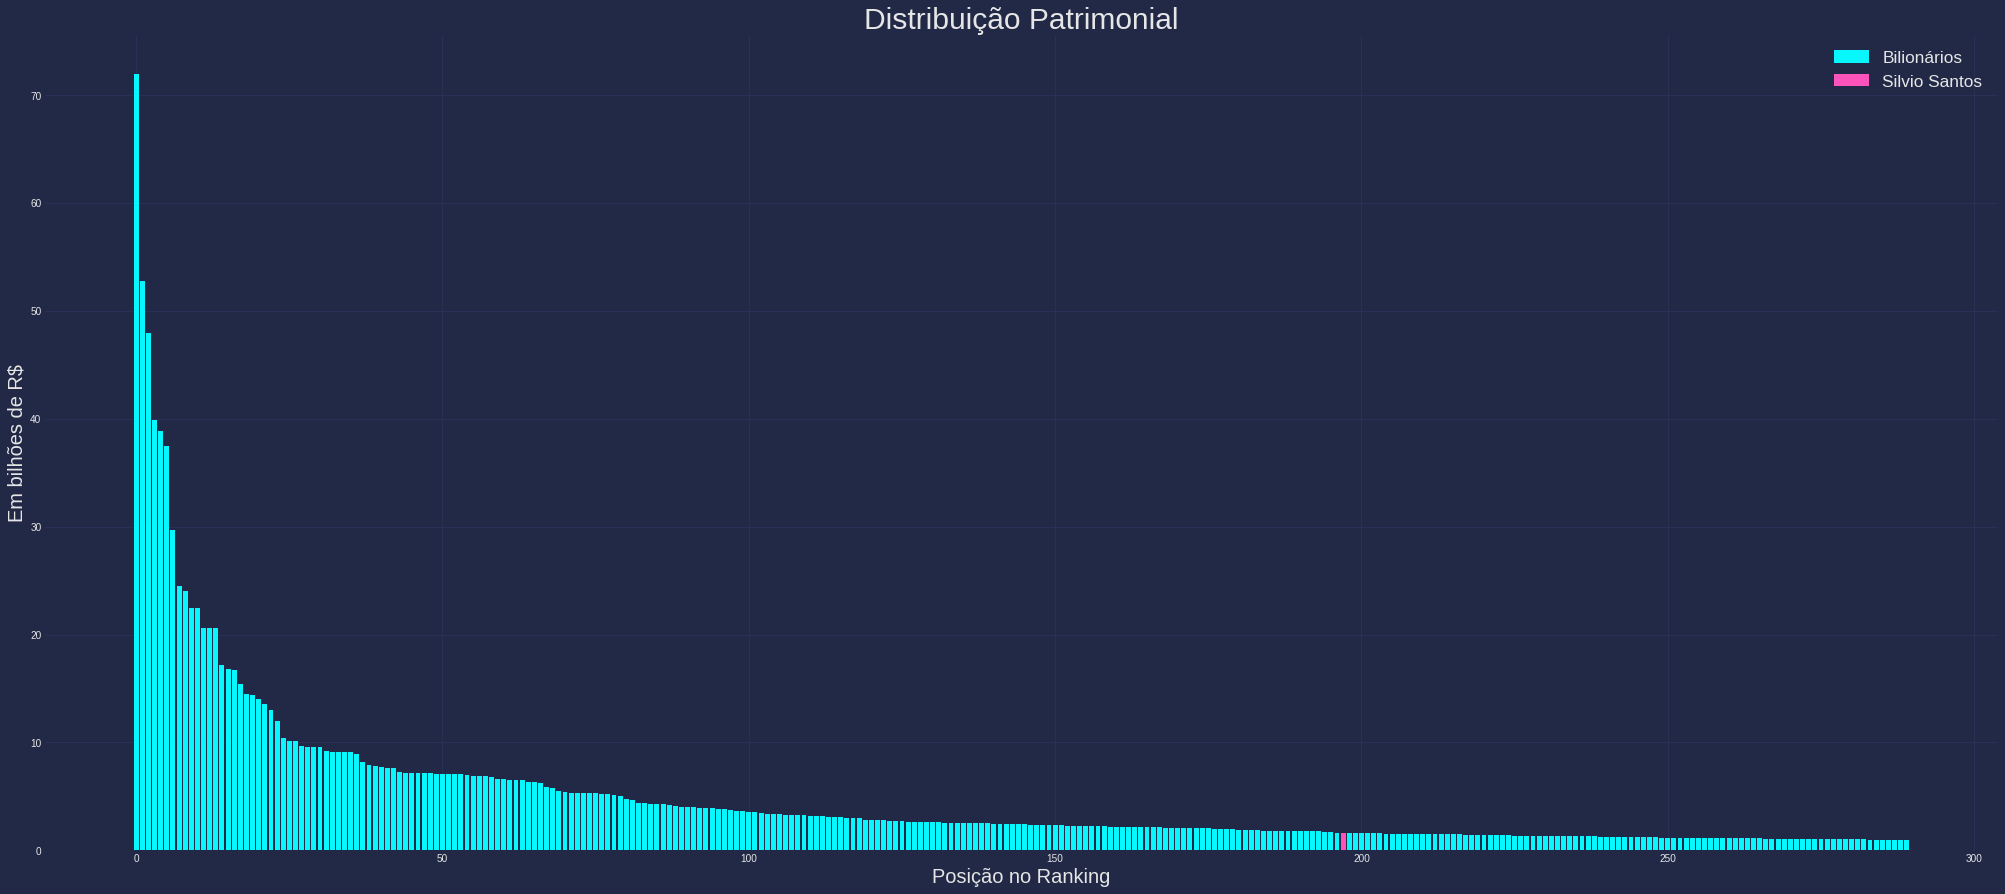

In [8]:
plt.rc('figure', figsize=(35, 15))  # Definindo as dimensões do gráfico
plt.style.use("cyberpunk")  # Definindo o tema do gráfico
plt.bar(df_billionaires.index, df_billionaires['Patrimônio em bilhões R$'])  # Plotando um gráfico de barras com a coluna do patrimônio
plt.bar(silvio_santos_position, df_billionaires['Patrimônio em bilhões R$'][silvio_santos_position])  # Destacando o patrimônio do Silvio Santos no gráfico
plt.legend(['Bilionários', 'Silvio Santos'], fontsize='xx-large')  # Definindo o texto da legenda e o tamanho da fonte
plt.title('Distribuição Patrimonial', fontsize='30')  # Definindo o texto e o tamanho da fonte do título do gráfico
plt.xlabel('Posição no Ranking', fontsize='20')  # Definindo o texto e o tamanho da fonte do eixo X
plt.ylabel('Em bilhões de R$', fontsize='20')  # Definindo o texto e o tamanho da fonte do eixo Y

## Orçamento Anual da União de 2022

In [9]:
OAU_URL_2022 = 'https://www.portaldatransparencia.gov.br/orcamento?ano=2022'  # URL do Portal da Transparência de onde será feito o webscraping dos dados do Orçamento Anual da União
oau_response = requests.get(OAU_URL_2022, headers=BROWSERS)  # Conteúdo da página em binário
oau_content = oau_response.text  # Conteúdo da página em HTML
oau_soup = BeautifulSoup(oau_content, 'html.parser')  # Transformando o conteúdo da página em objetos do BeautifullSoup

In [10]:
oau_2022 = float(oau_soup.select('#totalDespesas')[0].text.split(' ')[1].replace('.', '').replace(',', '.')) / 1000000000  # Transformando o total das despesas em bilhões
billionaries_patrimony = df_billionaires['Patrimônio em bilhões R$'].sum()  # Somando o total o patrimônio dos bilionários

In [11]:
print(f'Orçamento Anual da União de 2022: R$ {round(oau_2022, 2)} bilhões.')
print(f'Patrimônio total dos bilionários em 2022: R$ {billionaries_patrimony} bilhões.')
print(f'O gasto ANUAL da União foi {round(round(oau_2022, 2) / billionaries_patrimony, 2)} vezes maior do que a soma do patrimônio total dos bilionários.')

Orçamento Anual da União de 2022: R$ 4861.73 bilhões.
Patrimônio total dos bilionários em 2022: R$ 1461.75 bilhões.
O gasto ANUAL da União foi 3.33 vezes maior do que a soma do patrimônio total dos bilionários.


In [12]:
plt.rc('figure', figsize=(15, 10))  # Redefinindo o tamanho do gráfico

Obtendo a média de gastos mensais enquanto for menor do que o patrimônio dos bilionários

In [13]:
spending = 0
monthly_expenses = []
months = []
index = 1

locale.setlocale(locale.LC_ALL, '')

while spending < billionaries_patrimony:
    spending += oau_2022 / 12
    monthly_expenses.append(spending)
    date = datetime(2022, index, 1, 0, 0, 0)
    months.append(date.strftime('%B').capitalize())
    index += 1

In [14]:
df_oau_billionaires = pd.DataFrame()
df_oau_billionaires.index = months
df_oau_billionaires['Gastos Mensais'] = monthly_expenses
df_oau_billionaires['Gastos Mensais'] = df_oau_billionaires['Gastos Mensais'].apply(lambda x : round(x, 2))
df_oau_billionaires

,Gastos Mensais
Janeiro,405.14
Fevereiro,810.29
Março,1215.43
Abril,1620.58


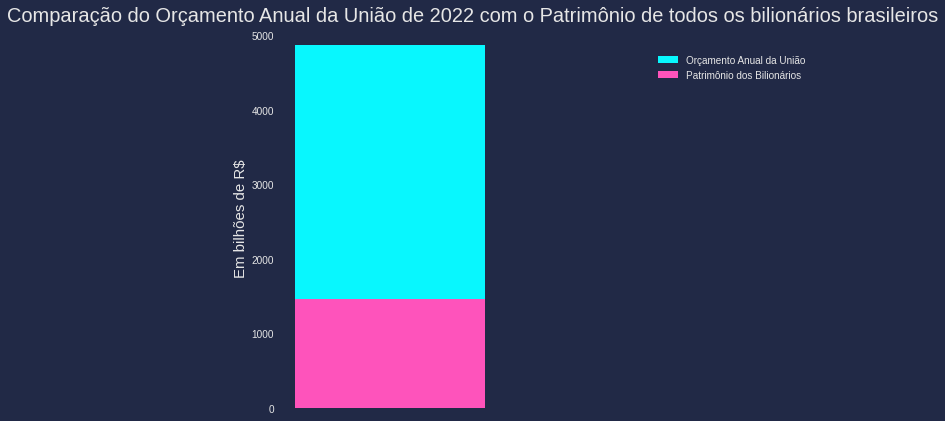

In [15]:
plt.rc('figure', figsize=(7, 7))
plt.bar(0, oau_2022, label='Orçamento Anual da União')
plt.bar(0, billionaries_patrimony, label='Patrimônio dos Bilionários')
plt.bar(0.7, 0)
plt.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(0.95, 0.95))
plt.title('Comparação do Orçamento Anual da União de 2022 com o Patrimônio de todos os bilionários brasileiros', fontsize=20)
plt.ylabel('Em bilhões de R$', fontsize=15)
plt.grid(False)
ax=plt.gca()
ax.get_xaxis().set_visible(False)

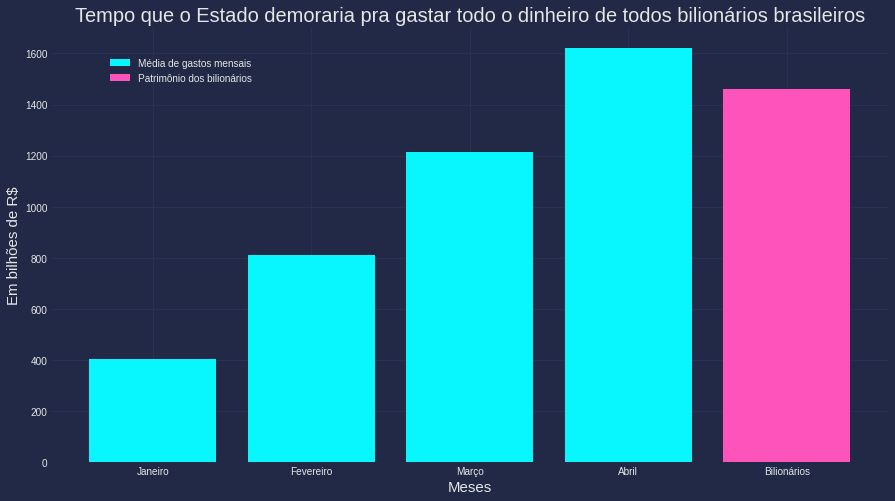

In [16]:
plt.rc('figure', figsize=(15, 8))
plt.bar(df_oau_billionaires.index, df_oau_billionaires['Gastos Mensais'], label='Média de gastos mensais')
plt.bar('Bilionários', billionaries_patrimony, label='Patrimônio dos bilionários')
plt.title('Tempo que o Estado demoraria pra gastar todo o dinheiro de todos bilionários brasileiros', fontsize='20')
plt.xlabel('Meses', fontsize='15')
plt.ylabel('Em bilhões de R$', fontsize='15')
plt.legend(loc='upper right', bbox_to_anchor=(0.25, 0.95))